In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV




In [2]:
# load the dataset 
# df = sns.load_dataset("titanic")
# df.to_csv("../dataset/titanic.csv")
df = pd.read_csv("../dataset/titanic.csv")
df.drop(columns="Unnamed: 0", inplace = True)
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
df.shape

(891, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df.drop(columns="deck", inplace = True)
df.drop(columns="alive", inplace = True)
df.drop(columns="adult_male", inplace = True)
df["age"]= df.age.fillna(value= df["age"].mean())
df["embark_town"]= df.embark_town.fillna(value= df["embark_town"].mode()[0])
df["embarked"]= df.embarked.fillna(value= df["embarked"].mode()[0])
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
embark_town    0
alone          0
dtype: int64

In [ ]:
df['alone'] = df['alone'].map({True: "Yes", False: "No"})
df['alone'].astype(str)
df["alone"].head(3)

0     No
1     No
2    Yes
Name: alone, dtype: object

In [ ]:
print(df['sex'].value_counts())

sex
male      577
female    314
Name: count, dtype: int64


survived
0    549
1    342
Name: count, dtype: int64


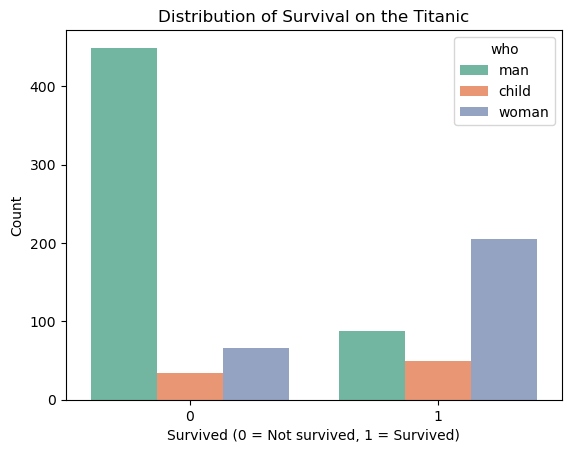

In [ ]:
print(df["survived"].value_counts())

# Set the color palette to 'Set2'
sns.set_palette('Set2')
# Create a count plot for the 'survived' column
sns.countplot(x='survived',hue="who", data=df)

# Customize labels and title
plt.xlabel('Survived (0 = Not survived, 1 = Survived)')
plt.ylabel('Count')
plt.title('Distribution of Survival on the Titanic')

# Display the plot
plt.show()


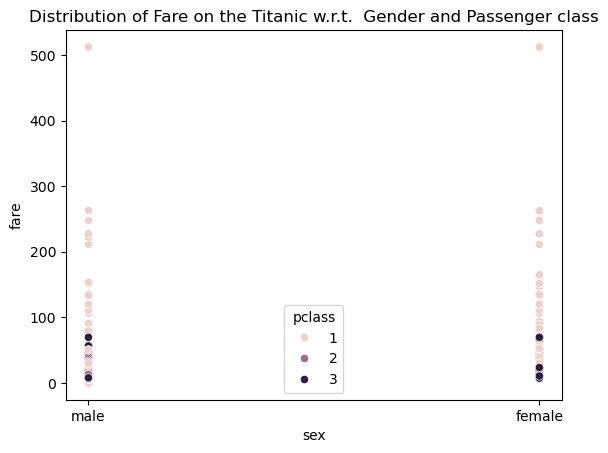

In [ ]:
sns.scatterplot(data = df, x="sex", y="fare", hue="pclass")

plt.title('Distribution of Fare on the Titanic w.r.t.  Gender and Passenger class')

# Display the plot
plt.show()

<Axes: xlabel='age', ylabel='fare'>

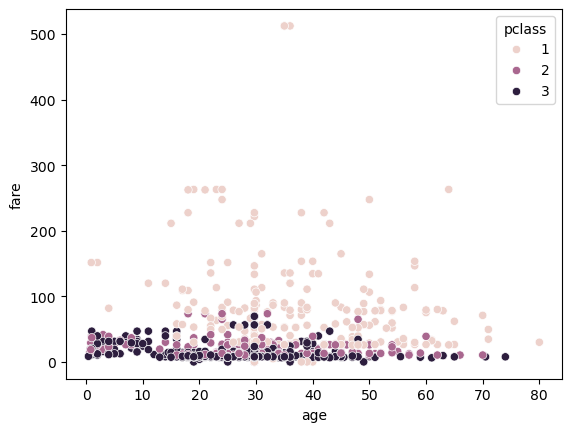

In [ ]:
sns.scatterplot(x='age', y='fare', hue = 'pclass', data = df) 

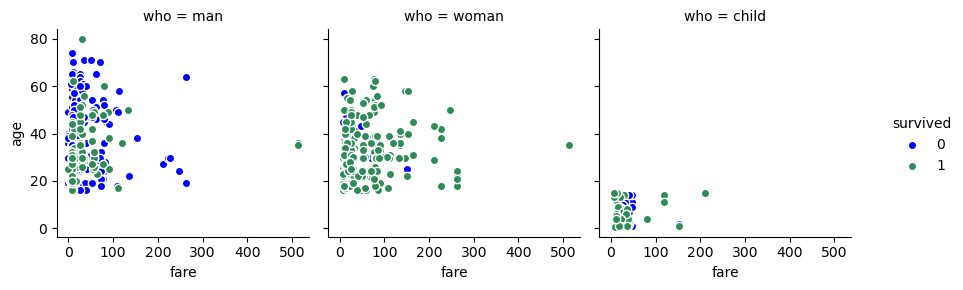

In [ ]:
g = sns.FacetGrid(df, hue = 'survived', col = 'who', margin_titles = 'True', palette={1:'seagreen', 0:'blue'})
g=g.map(plt.scatter,'fare','age', edgecolor='w').add_legend()

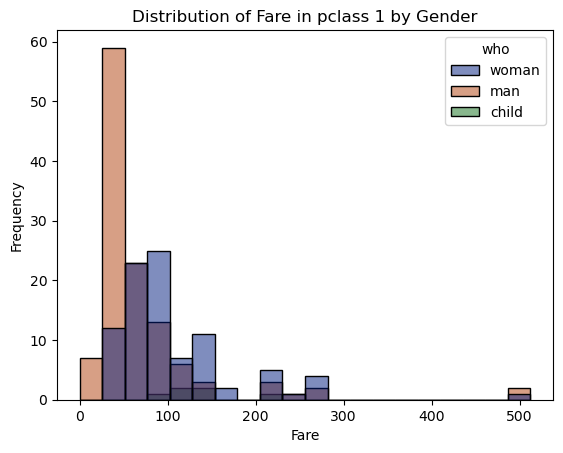

In [ ]:
# Filter rows where 'pclass' equals 1
filtered_df = df[df['pclass'] == 1]

# Set the color palette to 'dark'
sns.set_palette('dark')

# Plot histogram of 'fare' with 'sex' as hue
sns.histplot(data=filtered_df, x='fare', hue='who', bins=20, kde=False)

# Add labels and title
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare in pclass 1 by Gender')

# Show the plot
plt.show()


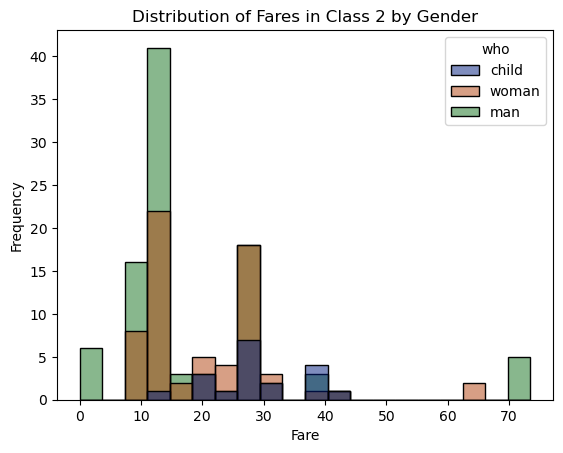

In [ ]:
# Filter rows where 'pclass' equals 2
filtered_df = df[df['pclass'] == 2]

# Set the color palette to 'dark'
sns.set_palette('dark')

# Plot histogram of 'fare' with 'sex' as hue
sns.histplot(data=filtered_df, x='fare', hue='who', bins=20, kde=False)

# Add labels and title
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fares in Class 2 by Gender')

# Show the plot
plt.show()


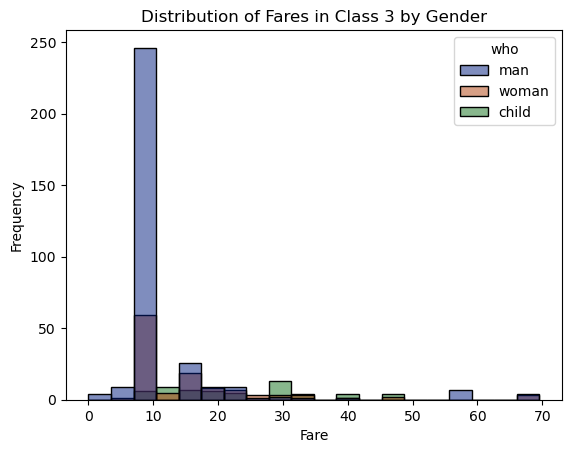

In [ ]:
# Filter rows where 'pclass' equals 3
class_3 = df[df['pclass'] == 3]

# Set the color palette to 'dark'
sns.set_palette('dark')

# Plot histogram of 'fare' with 'sex' as hue
sns.histplot(data=class_3, x='fare', hue='who', bins=20, kde=False)

# Add labels and title
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fares in Class 3 by Gender')

# Show the plot
plt.show()


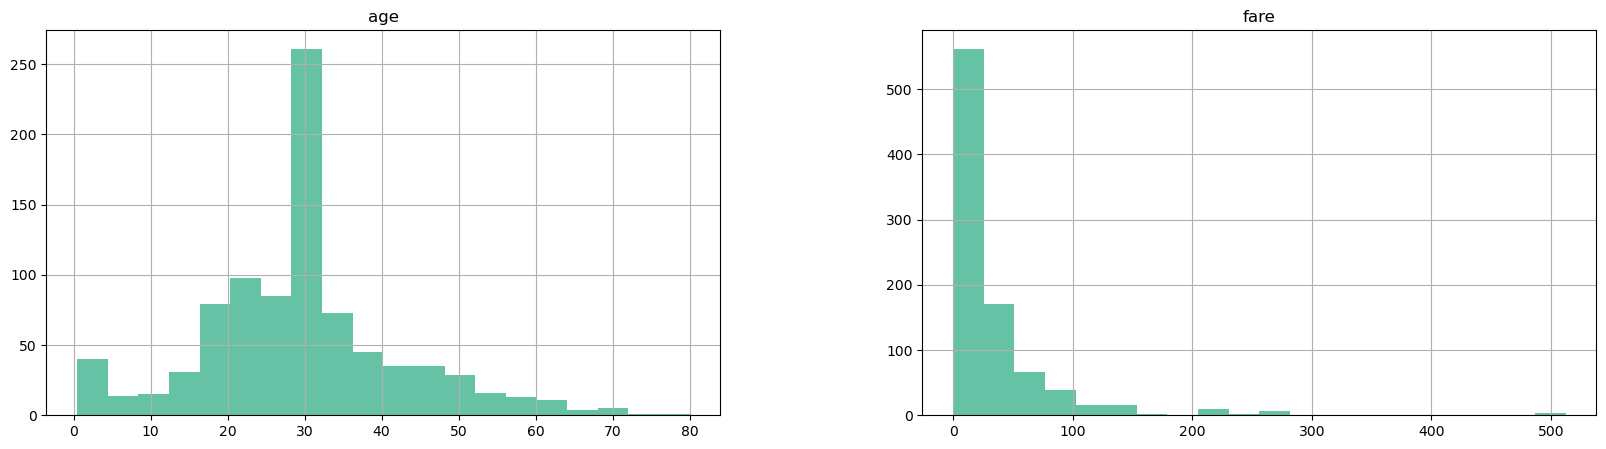

In [ ]:
# Set the color palette to 'Set2'
sns.set_palette('Set2')
# Plot histograms
df[['age', 'fare']].hist(bins=20, figsize=(20, 5))
plt.show()


<Axes: xlabel='sex', ylabel='age'>

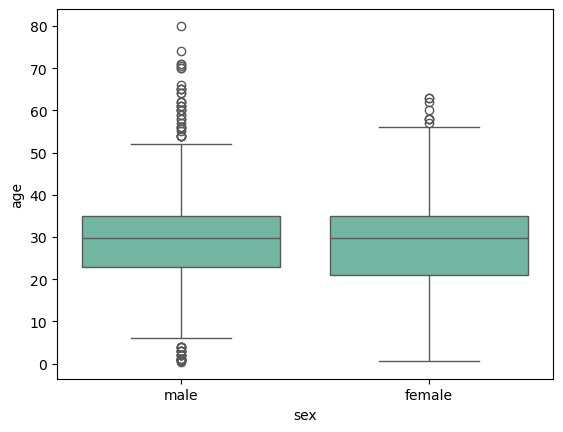

In [ ]:
sns.boxplot(data = df, x="sex", y="age")

In [ ]:
df["age"].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [ ]:
filtered_row = df[df["age"]==80].shape[0]
print("Total count of passengers aged 80:" ,filtered_row)

Total count of passengers aged 80: 1


In [ ]:
filtered_row = df[(df["age"]>35)& (df["age"]<80)].shape[0]
print("Total count of passengers aged between 35 and 80:" ,filtered_row)

Total count of passengers aged between 35 and 80: 216


<Axes: xlabel='sex', ylabel='fare'>

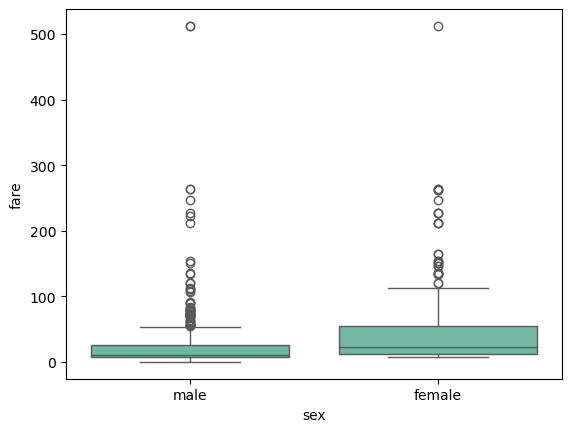

In [ ]:
sns.boxplot(data = df, x="sex", y="fare")

In [ ]:
df["fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [ ]:
count = (df['fare'] == 512.329200).sum()
print("Number of persons with fare of 512.329200:", count)

Number of persons with fare of 512.329200: 3


In [ ]:
# Filter and count rows
count = df[(df['fare'] > 31) & (df['fare'] < 512.329200)].shape[0]
print("Number of persons with fare between 30.070800 and 512.329200:", count)

Number of persons with fare between 30.070800 and 512.329200: 219


In [ ]:
# Filter and count rows
count = df[(df['fare'] > 263) & (df['fare']  < 513)].shape[0]
print("Number of persons with fare between 30.070800 and 513:", count)


Number of persons with fare between 30.070800 and 513: 3


In [ ]:
filtered_rows = df[df['fare'] > 263]
print(filtered_rows)


     survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
258         1       1  female  35.0      0      0  512.3292        C  First   
679         1       1    male  36.0      0      1  512.3292        C  First   
737         1       1    male  35.0      0      0  512.3292        C  First   

       who embark_town alone  
258  woman   Cherbourg   Yes  
679    man   Cherbourg    No  
737    man   Cherbourg   Yes  


In [ ]:
# cl_data = df 
# cl_data.to_csv("../dataset/cleaned_data.csv")
# cl_data.isnull().sum()

In [ ]:
df = df[df['fare'] <= 263]
print(df)

     survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  embark_town alone  
0     Third    man  Southampton    No  
1     F

<Axes: xlabel='pclass,survived'>

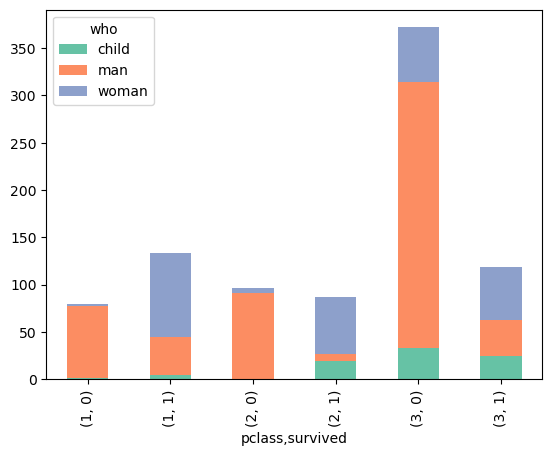

In [ ]:
df.groupby(['pclass','survived'])['who'].value_counts().unstack().plot(kind= 'bar', stacked = True)

# Splitting Data for Training & Testing
Separate the target variable (survived) and split data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("survived", axis=1)  # Features
y = df["survived"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Identify numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# List of categorical columns to encode
categorical_cols = ['sex', 'embarked', 'class', 'who', 'embark_town', "alone"]

# Create a column transformer with OneHotEncoder and StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Define the models to be evaluated
models = [
    LogisticRegression(max_iter=1000),  # Increased max_iter for convergence
    KNeighborsClassifier(),
    RandomForestClassifier(),
    SVC(),
    DecisionTreeClassifier()
]
model_names = [
    'Logistic Regression',
    'KNN Classifier',
    'Random Forest Classifier',
    'SVC',
    'Decision Tree Classifier'
]

# Evaluate each model and collect detailed metrics
model_results = []
for model, model_name in zip(models, model_names):
    # Create a pipeline for the current model
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    # Fit the pipeline on the training data
    pipe.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = pipe.predict(X_test)
    
    # Calculate standard scores
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Generate detailed reports
    class_report = classification_report(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)
    
    # Calculate cross-validation scores on the entire dataset
    cv_scores = cross_val_score(pipe, X, y, cv=5)
    mean_cv = np.mean(cv_scores)
    
    # Save all metrics in a dictionary
    model_results.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'Mean CV Score': mean_cv,
        'Classification Report': class_report,
        'Confusion Matrix': conf_mat,
        'CV Scores': cv_scores
    })

# Create a summary DataFrame for key metrics
results_summary = pd.DataFrame(model_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','Mean CV Score'])
print("Model Summary:")
print(results_summary)

# Now, print detailed evaluation for each model
for result in model_results:
    print("\n--------------------------------------")
    print(f"Model: {result['Model']}")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("\nClassification Report:")
    print(result['Classification Report'])
    print("\nCross-Validation Scores:", result['CV Scores'])
    print("Mean CV Score: {:.2f}".format(result['Mean CV Score']))


Model Summary:
                      Model  Accuracy  Precision    Recall  F1 Score  \
0       Logistic Regression  0.835206   0.818182  0.757009  0.786408   
1            KNN Classifier  0.831461   0.844444  0.710280  0.771574   
2  Random Forest Classifier  0.820225   0.810526  0.719626  0.762376   
3                       SVC  0.835206   0.898734  0.663551  0.763441   
4  Decision Tree Classifier  0.775281   0.747368  0.663551  0.702970   

   Mean CV Score  
0       0.817603  
1       0.801854  
2       0.807453  
3       0.826585  
4       0.788282  

--------------------------------------
Model: Logistic Regression
Confusion Matrix:
[[142  18]
 [ 26  81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       160
           1       0.82      0.76      0.79       107

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.83       267
weighted avg       0.83      0.84 

In [ ]:

# Create a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Expand the parameter grid
param_grid = {
    'logreg__C': [0.1],  # Regularization strength
    'logreg__penalty': ['l1'],  # Regularization type
    'logreg__solver': ['liblinear'],  # Solvers
    'logreg__fit_intercept': [True],  # Whether to fit the intercept
    'logreg__tol': [0.0001]  # Tolerance for stopping criteria
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X, y)

# Make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')


# Print results
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Confusion Matrix:\n", conf_matrix)



Best Parameters: {'logreg__C': 0.1, 'logreg__fit_intercept': True, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear', 'logreg__tol': 0.0001}
Accuracy: 0.8389513108614233
Precision: 0.826530612244898
Recall: 0.7570093457943925
F1 Score: 0.7902439024390244
Cross-validation Scores: [0.84269663 0.81460674 0.8258427  0.78531073 0.84745763]
Mean CV Score: 0.8231828857995304
Confusion Matrix:
 [[143  17]
 [ 26  81]]


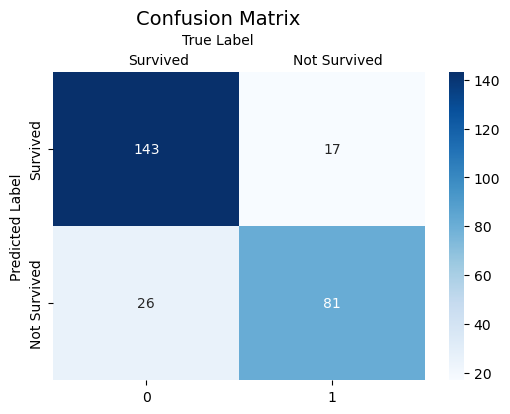

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create figure and axis
plt.figure(figsize=(6, 4))

# Title
plt.figtext(0.4, 1.0, "Confusion Matrix", ha="center", fontsize=14)

# Add True label and xticklabels
plt.figtext(0.4, 0.95, "True Label", ha="center", fontsize=10)
plt.figtext(0.3, 0.9, "Survived", ha="center", fontsize=10)
plt.figtext(0.6, 0.9, "Not Survived", ha="center", fontsize=10)


# Plot heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            yticklabels=['Survived', 'Not Survived'])

plt.ylabel("Predicted Label")

plt.show()


In [ ]:
# pip install --upgrade numpy


In [ ]:
# saving the model
import joblib

# Save the trained pipeline to a file
joblib.dump(best_model, 'titanic_trained_model.pkl')


['titanic_trained_model.pkl']

In [ ]:
# import joblib

# Load the saved model from the file
loaded_model = joblib.load('titanic_trained_model.pkl')

# Now you can use loaded_model to make predictions
y_pred_loaded = loaded_model.predict(X_test)
y_pred_loaded


array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0])

In [ ]:
# Accuracy of trained model
trained_accuracy = best_model.score(X_test, y_test)

# Accuracy of loaded model
loaded_accuracy = loaded_model.score(X_test, y_test)

print(f"Trained Model Accuracy: {trained_accuracy:.4f}")
print(f"Loaded Model Accuracy: {loaded_accuracy:.4f}")

# Check if both are the same
if np.isclose(trained_accuracy, loaded_accuracy, atol=1e-4):
    print("✅ The saved model has the same accuracy as the trained model!")
else:
    print("❌ The saved model's accuracy is different. Check for issues!")


Trained Model Accuracy: 0.8390
Loaded Model Accuracy: 0.8390
✅ The saved model has the same accuracy as the trained model!
